Сводка результатов квантования Llama-3.2-1B-Instruct


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

mem_results = pd.DataFrame(
    [
        {"type": "bf16", "memory_mb": 32.0},
        {"type": "int4", "memory_mb": 8.0},
    ]
)

speed_results = pd.DataFrame(
    [
        {"B": 128, "int4_ms": 0.531, "fp16_ms": 0.226, "speedup": 0.43},
        {"B": 512, "int4_ms": 1.299, "fp16_ms": 0.581, "speedup": 0.45},
        {"B": 2048, "int4_ms": 4.806, "fp16_ms": 2.884, "speedup": 0.60},
    ]
)

ppl_results = pd.DataFrame(
    [
        {
            "model": "fp16",
            "perplexity": 36.8581,
            "eval_time_s": 284.20,
            "tokens": 249856,
            "tokens_per_sec": 879.17,
        },
        {
            "model": "int4",
            "perplexity": 71.0608,
            "eval_time_s": 143.44,
            "tokens": 249856,
            "tokens_per_sec": 1741.88,
        },
    ]
)

mem_results


,type,memory_mb
0,bf16,32.0
1,int4,8.0


In [2]:
speed_results


,B,int4_ms,fp16_ms,speedup
0,128,0.531,0.226,0.43
1,512,1.299,0.581,0.45
2,2048,4.806,2.884,0.60


In [3]:
ppl_results


,model,perplexity,eval_time_s,tokens,tokens_per_sec
0,fp16,36.8581,284.20,249856,879.17
1,int4,71.0608,143.44,249856,1741.88


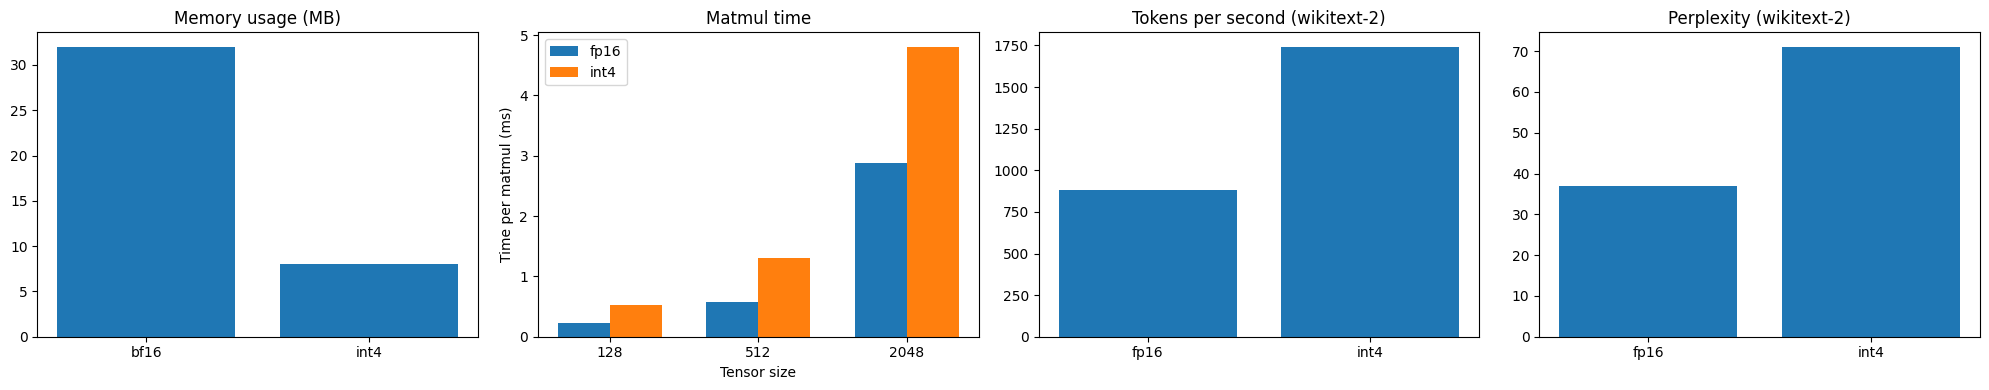

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

axes[0].bar(mem_results["type"], mem_results["memory_mb"])
axes[0].set_title("Memory usage (MB)")

x = speed_results["B"].astype(str)
width = 0.35
positions = range(len(x))
axes[1].bar([p - width / 2 for p in positions], speed_results["fp16_ms"], width=width, label="fp16")
axes[1].bar([p + width / 2 for p in positions], speed_results["int4_ms"], width=width, label="int4")
axes[1].set_xticks(list(positions))
axes[1].set_xticklabels(x)
axes[1].set_xlabel("Tensor size")
axes[1].set_ylabel("Time per matmul (ms)")
axes[1].legend()
axes[1].set_title("Matmul time")

axes[2].bar(ppl_results["model"], ppl_results["tokens_per_sec"])
axes[2].set_title("Tokens per second (wikitext-2)")

axes[3].bar(ppl_results["model"], ppl_results["perplexity"])
axes[3].set_title("Perplexity (wikitext-2)")

plt.tight_layout()
plt.show()
